In [1]:
from PIL import Image
import os
import shutil
import numpy as np
# import cv2
import re
import pickle
import random
import time
# from tqdm import tqdm
import pandas as pd 
from glob import glob
from xml.etree.ElementTree import parse
# from pascal_voc_writer import Writer
import matplotlib.pyplot as plt

In [2]:
import os
import numpy as np 
import pandas as pd 
from datetime import datetime
import time
import random
from tqdm.auto import tqdm


#Torch
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
from torch.utils.data.sampler import SequentialSampler, RandomSampler

#sklearn
from sklearn.model_selection import StratifiedKFold

#CV
import cv2

# ################# DETR FUCNTIONS FOR LOSS######################## 
# import sys
# sys.path.extend(['/tmp/packages/detr/'])

# from models.matcher import HungarianMatcher
# from models.detr import SetCriterion
#################################################################

#Albumenatations
import albumentations as A
import matplotlib.pyplot as plt
from albumentations.pytorch.transforms import ToTensorV2

#Glob
from glob import glob

In [3]:
import sys
sys.path.extend(['./util/'])
from data_parser import *
from image_prepro import *

In [4]:
# !pip3 install opencv-python
# !pip3 install tqdm
# !pip3 install sklearn
# !pip3 install albumentations

In [5]:
files = [os.path.join('Dataset/original/SS/00/' + d ) for d in os.listdir('Dataset/original/SS/00/') if d.endswith(".jpg")  ]
files[0:10]

['Dataset/original/SS/00/20191227_102828.jpg',
 'Dataset/original/SS/00/20200107_113324.jpg',
 'Dataset/original/SS/00/20200107_112718.jpg',
 'Dataset/original/SS/00/20200107_105734.jpg',
 'Dataset/original/SS/00/20191218_131145.jpg',
 'Dataset/original/SS/00/20191226_111153.jpg',
 'Dataset/original/SS/00/20191108_133854.jpg',
 'Dataset/original/SS/00/20191025_153123.jpg',
 'Dataset/original/SS/00/20191226_134223.jpg',
 'Dataset/original/SS/00/20191108_130615.jpg']

In [6]:
path = 'Dataset/original/SS/00/20191025_100424.jpg'
# image_crop( path)
from PIL import Image
# Image.open(path)
# for i in files[0:3] :
#     print(i)
#     plt.imshow(img, cmap='gray')
#     Image.open(i)
# Image.open(files[5])    

In [7]:
# !ls Dataset/original/SS/00
path1 = 'Dataset/original/SS/00/20191025_100424.jpg'
print(path)
# image_crop( path1)

Dataset/original/SS/00/20191025_100424.jpg


In [8]:
# Image.open(path)
img = cv2.imread(path1)
# w, h, ch = img.shape
# if (w, h) == (4032, 1960) :
#     h_margin = 1341
#     w_margin = 305
#     img = img[h_margin:-h_margin, w_margin:-w_margin, :]
# img.shape  
print(type(img))

<class 'numpy.ndarray'>


In [9]:
# cv2.imshow('image', img)
# # plt.imshow(img, cmap='gray')
# # # plt.imshow(img, cmap='rgb')
# # plt.show()


In [10]:
import cv2

In [11]:

# [os.path.join(fileDir, _) for _ in os.listdir(fileDir) if _.endswith(fileExt)]

    

In [12]:
src_path = '/home/beomgon/DETR/Dataset/original'
df = pd.DataFrame(columns=['label', 'bbox', 'xmin','ymin','xmax','ymax','width','height', 'path'])
# df = pd.DataFrame(columns=['class','bbox', 'path'])
data_list = []
for dir_name in ['SS', 'SS2']:
    dpath = os.path.join(src_path, dir_name)
    dir_lists = os.listdir(dpath)    
    
    for dir_list in dir_lists :
        dpath2 = os.path.join(dpath, dir_list)
        xml_list = [os.path.join(dpath2, d) for d in os.listdir(dpath2) if d.endswith(".xml")]
#         print(xml_list)
        for xml_path in xml_list :
            parser = XMLParser(xml_path)
#             if (parser.height, parser.width) not in parser.rejection_size:  
            for obj in parser.objects :
#                     obj_class = obj[0]
#                     if obj_class in rej_table :
#                         continue
#                     print(obj)
                jpg_path = re.sub('xml', 'jpg', xml_path)
# #                     print(jpg_path)
                obj.append(parser.width)
                obj.append(parser.height)
                obj.append(jpg_path)
                data_list.append(obj)
# #                     print(obj)

        
        
        

In [13]:
# data_list

In [14]:
df = pd.DataFrame(data_list,columns=['label', 'bbox', 'xmin','ymin','xmax','ymax','width','height', 'path'])
df.head()

,label,bbox,xmin,ymin,xmax,ymax,width,height,path
0,Carcinoma,"[2123, 928, 2253, 1077]",2123,928,2253,1077,4032,1960,/home/beomgon/DETR/Dataset/original/SS/08(2008...
1,Carcinoma,"[1947, 295, 2015, 438]",1947,295,2015,438,4032,1960,/home/beomgon/DETR/Dataset/original/SS/08(2008...
2,Carcinoma,"[1973, 579, 2043, 663]",1973,579,2043,663,4032,1960,/home/beomgon/DETR/Dataset/original/SS/08(2008...
3,Carcinoma,"[1897, 650, 1987, 736]",1897,650,1987,736,4032,1960,/home/beomgon/DETR/Dataset/original/SS/08(2008...
4,Carcinoma,"[1947, 859, 2004, 1006]",1947,859,2004,1006,4032,1960,/home/beomgon/DETR/Dataset/original/SS/08(2008...


In [15]:

df = df.reset_index()
df[7235:7239]

,index,label,bbox,xmin,ymin,xmax,ymax,width,height,path
7235,7235,Carcinoma,"[2422, 1401, 2484, 1495]",2422,1401,2484,1495,4032,1960,/home/beomgon/DETR/Dataset/original/SS/08(2009...
7236,7236,Carcinoma,"[2261, 1377, 2324, 1463]",2261,1377,2324,1463,4032,1960,/home/beomgon/DETR/Dataset/original/SS/08(2009...
7237,7237,Carcinoma,"[2064, 1373, 2135, 1453]",2064,1373,2135,1453,4032,1960,/home/beomgon/DETR/Dataset/original/SS/08(2009...
7238,7238,,"[1724, 748, 1819, 813]",1724,748,1819,813,4032,1960,/home/beomgon/DETR/Dataset/original/SS/08(2009...


In [16]:
df = df[['label', 'width','height', 'bbox', 'xmin','ymin','xmax','ymax', 'path']]
df[['x', 'y', 'w', 'h']] = 0
df.head()
for i in range(len(df)) :
# for i in range(100) :
    df.loc[i, 'x'] = int((df.loc[i, 'xmin'] + df.loc[i, 'xmax'])/2)
    df.loc[i, 'y'] = int((df.loc[i, 'ymin'] + df.loc[i, 'ymax'])/2)
    df.loc[i, 'w'] = df.loc[i, 'xmax'] - df.loc[i, 'xmin']
    df.loc[i, 'h'] = df.loc[i, 'ymax'] - df.loc[i, 'ymin']
#     df.y = int((df.ymin + df.max)/2)
#     df.w = df.xmax - df.xmin
#     df.h = df.ymax - df.ymin

In [17]:
df.head()

,label,width,height,bbox,xmin,ymin,xmax,ymax,path,x,y,w,h
0,Carcinoma,4032,1960,"[2123, 928, 2253, 1077]",2123,928,2253,1077,/home/beomgon/DETR/Dataset/original/SS/08(2008...,2188,1002,130,149
1,Carcinoma,4032,1960,"[1947, 295, 2015, 438]",1947,295,2015,438,/home/beomgon/DETR/Dataset/original/SS/08(2008...,1981,366,68,143
2,Carcinoma,4032,1960,"[1973, 579, 2043, 663]",1973,579,2043,663,/home/beomgon/DETR/Dataset/original/SS/08(2008...,2008,621,70,84
3,Carcinoma,4032,1960,"[1897, 650, 1987, 736]",1897,650,1987,736,/home/beomgon/DETR/Dataset/original/SS/08(2008...,1942,693,90,86
4,Carcinoma,4032,1960,"[1947, 859, 2004, 1006]",1947,859,2004,1006,/home/beomgon/DETR/Dataset/original/SS/08(2008...,1975,932,57,147


In [18]:
df.drop(columns=['bbox', 'xmin', 'ymin', 'xmax', 'ymax'], inplace=True)
df.head()

,label,width,height,path,x,y,w,h
0,Carcinoma,4032,1960,/home/beomgon/DETR/Dataset/original/SS/08(2008...,2188,1002,130,149
1,Carcinoma,4032,1960,/home/beomgon/DETR/Dataset/original/SS/08(2008...,1981,366,68,143
2,Carcinoma,4032,1960,/home/beomgon/DETR/Dataset/original/SS/08(2008...,2008,621,70,84
3,Carcinoma,4032,1960,/home/beomgon/DETR/Dataset/original/SS/08(2008...,1942,693,90,86
4,Carcinoma,4032,1960,/home/beomgon/DETR/Dataset/original/SS/08(2008...,1975,932,57,147


In [19]:
# df.xmin = df.xmin.apply(lambda x : float(x))
# df.ymin = df.ymin.apply(lambda x : float(x))
# df.xmax = df.xmax.apply(lambda x : float(x))
# df.ymax = df.ymax.apply(lambda x : float(x))
# df.head()

In [20]:
n_folds = 5
seed = 42
null_class_coef = 0.5
num_classes = 1
num_queries = 100
BATCH_SIZE = 8
LR = 5e-5
lr_dict = {'backbone':0.1,'transformer':1,'embed':1,'final': 5}
EPOCHS = 2
max_norm = 0
model_name = 'detr_resnet50'

In [21]:
df.label = df.label.apply(lambda x : np.nan if str(x) == '' else x)
set(df.label)
print(df.shape)
df.dropna(subset=['label'], inplace=True)
print(df.shape)
print(set(df.label))
df.label = df.label.apply(lambda x : make_3class_label(x))
set(df.label)

(106525, 8)
(101932, 8)
{'Carcinoma', 'ASCUS', 'LSIL', 'HSIL', 'Normal'}


{'High-Risk', 'Low-Risk', 'Negative'}

In [22]:
df.head()

,label,width,height,path,x,y,w,h
0,High-Risk,4032,1960,/home/beomgon/DETR/Dataset/original/SS/08(2008...,2188,1002,130,149
1,High-Risk,4032,1960,/home/beomgon/DETR/Dataset/original/SS/08(2008...,1981,366,68,143
2,High-Risk,4032,1960,/home/beomgon/DETR/Dataset/original/SS/08(2008...,2008,621,70,84
3,High-Risk,4032,1960,/home/beomgon/DETR/Dataset/original/SS/08(2008...,1942,693,90,86
4,High-Risk,4032,1960,/home/beomgon/DETR/Dataset/original/SS/08(2008...,1975,932,57,147


In [23]:
image_data = df.groupby('path')
image_data

In [24]:
# image_data = image_data.groupby('image_id')
# images = list(map(lambda x: x.split('.')[0], os.listdir('../input/global-wheat-detection/train/')))
images = set(list(df['path']))
images = list(images)
# images



In [25]:
def get_data(img_id):
    if img_id not in image_data.groups:
        return dict(image_id=img_id, label='', boxes=list())
    
    data  = image_data.get_group(img_id)
    label = data.label.values
#     label = np.unique(data.label.values)
#     assert len(label)==1, 'corrupted data: %s image_id has many labels: %s' %(img_id,label)
#     label=label[0]
    
    
    boxes = data[['x','y','w', 'h']].values
    return dict(image_id = img_id, label=label, boxes = boxes)


In [26]:

image_list = [get_data(img_id) for img_id in images]

In [36]:
image_list[72]['image_id']
image_list[72]['boxes']

array([[2014,  680,   64,   80],
       [2227,  224,   85,   76],
       [2457,  711,   60,   71],
       [1860,  724,   66,   52],
       [1576,  623,   89,   68],
       [2585,  949,   78,   53],
       [2246, 1344,   58,   76]])

In [31]:
n_folds = 5
seed = 42
null_class_coef = 0.5
num_classes = 1
num_queries = 100
BATCH_SIZE = 8
LR = 5e-5
lr_dict = {'backbone':0.1,'transformer':1,'embed':1,'final': 5}
EPOCHS = 2
max_norm = 0
model_name = 'detr_resnet50'

In [57]:
def draw_rect(img_path, bbox_points, color=(0, 255, 0), thickness=5, is_normalized=False):
    """ Draw rectangle
    Args:
        img: image
        bbox_points: [xmin, ymin, xmax, ymax]
        color: color rgb value
        thickness: line thickness
        is_normalized: Normalized points or not
    Return:
        img
    """
    img = cv2.imread(img_path)
    for box in bbox_points :   
        h, w = img.shape[:2]
        if is_normalized:
            xmin = int(box[0] * w)
            ymin = int(box[1] * h)
            xmax = int(box[2] * w)
            ymax = int(box[3] * h)
        else:
#             xmin = int(box[0])
#             ymin = int(box[1])
#             xmax = int(box[2])
#             ymax = int(box[3])
            xmin, ymin, xmax, ymax = (box[0]-box[2], box[1]-box[3], box[2]+box[0], box[3]+box[1])

            img = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), color, thickness)
            
    return img

def draw_marks(img, points_2d, color=(0, 255, 0), thickness=3, is_normalized=True):
    if is_normalized:
        h, w = img.shape[:2]
        for (x, y) in points_2d:
            cv2.circle(img, (int(x * w), int(y * h)), 1, color, thickness, 1)
    
    else:
        for (x, y) in points_2d:
            cv2.circle(img, (int(x), int(y)), 1, color, thickness, 1)

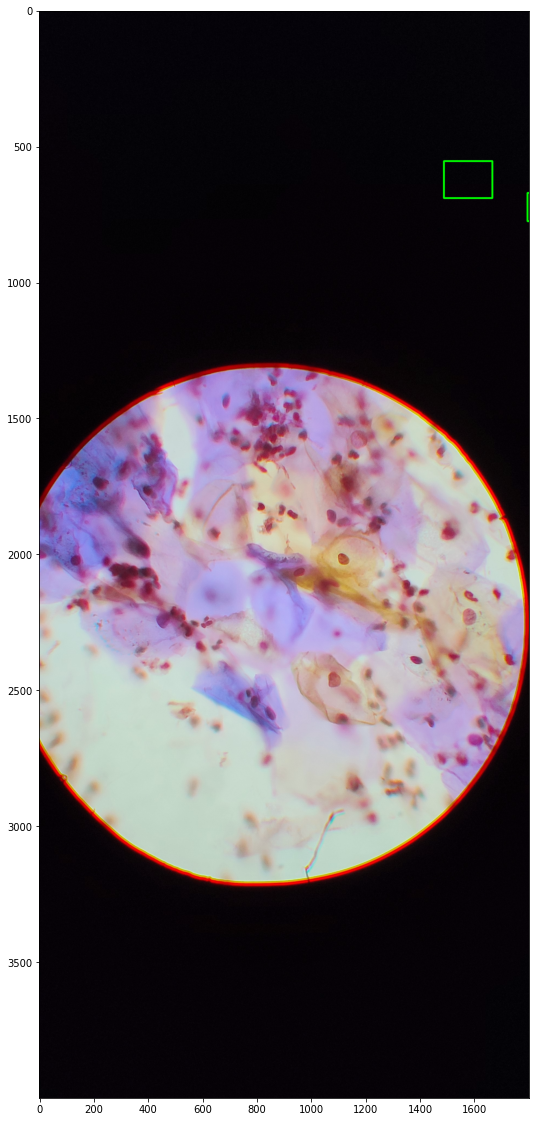

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

# img = cv2.imread(path1)
# bbox_points = [[1000, 900, 1200, 1000]]
# img = draw_rect(img, bbox_points)

img = draw_rect(image_list[72]['image_id'], image_list[72]['boxes'])

plt.figure(figsize=(10, 20))
plt.imshow(img)
# Image.open(img)


In [38]:
# def add_fold_index(lst,n_folds):
#     lens = [len(x['boxes']) for x in lst]
#     lens_unique = np.unique(lens)
#     i = np.random.randint(n_folds)
#     fold_indexes = [[] for _ in range(n_folds)]
#     idx = []
    
#     for _l in lens_unique:
#         idx.extend(np.nonzero(lens==_l)[0].tolist())
#         if len(idx)<n_folds: continue
#         random.shuffle(idx)
#         while len(idx)>= n_folds:
#             fold_indexes[i].append(lst[idx.pop()]['image_id'])
#             i = (i+1) % n_folds
#     while len(idx):
#         fold_indexes[i].append(lst[idx.pop()]['image_id'])
#         i = (i+1) % n_folds
    
#     return fold_indexes
    
# label = np.unique([x['label'] for x in image_list])

# splitted_image_list = {l:sorted([x for x in image_list if x['label']==l],key=lambda x: len(x['boxes'])) 
#                        for l in label}
# splitted_image_list = {k: add_fold_index(v,n_folds=n_folds) for k,v in splitted_image_list.items()}

# fold_indexes = [[] for _ in range(n_folds)]
# for k,v in splitted_image_list.items():
#     for i in range(n_folds):
#         fold_indexes[i].extend(v[i])  
    
# print([len(v) for v in fold_indexes])

In [138]:
if False:
    plt.figure(figsize=(10,10))
    for i,img in enumerate(null_images):
        plt.subplot(7,7,i+1)
        plt.imshow(plt.imread(f'../input/global-wheat-detection/train/{img}.jpg'))
        plt.axis('off')
        plt.axis('tight')
        plt.axis('equal')

    plt.show()

In [154]:
def get_train_transforms():
    return A.Compose(
        [
#             A.OneOf(
#             [
#                 A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit= 0.2, val_shift_limit=0.2, p=0.9),      
#                 A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.9)
#             ],
#             p=0.9),         
#             #A.ToGray(p=0.01),         
#             A.HorizontalFlip(p=0.5),         
#             A.VerticalFlip(p=0.5),         
#             A.Resize(height=500, width=500, p=1),      
#             A.Normalize(max_pixel_value=1),
            #A.Cutout(num_holes=8, max_h_size=32, max_w_size=32, fill_value=0, p=0.5),
            ToTensorV2(p=1.0)
        ], 
        p=1.0,         
        bbox_params=A.BboxParams(format='coco',min_area=0, min_visibility=0,label_fields=['labels'])
        )

def get_valid_transforms():
    return A.Compose([A.Resize(height=512, width=512, p=1.0),
                      A.Normalize(max_pixel_value=1),
                      ToTensorV2(p=1.0),
                      ], 
                      p=1.0, 
                      bbox_params=A.BboxParams(format='coco',min_area=0, min_visibility=0,label_fields=['labels'])
                      )

In [162]:
# DIR_TRAIN = '../input/global-wheat-detection/train'
class WheatDataset(Dataset):
    def __init__(self,image_list,transforms=None):
        self.images = image_list
        self.transforms = transforms
        self.img_ids = {x['image_id']:i for i,x in enumerate(image_list)}
        
    def get_indices(self,img_ids):
        return [self.img_ids[x] for x in img_ids]
        
    def __len__(self) -> int:
        return len(self.images)
    
    def __getitem__(self,index):
        record = self.images[index]
        image_id = record['image_id']
#         print(image_id)

        image = cv2.imread(image_id, cv2.IMREAD_COLOR)
#         print(type(image))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
        image /= 255.0
        
        # DETR takes in data in coco format 
        boxes = record['boxes'] 
        
        labels =  np.zeros(len(boxes), dtype=np.int32)

        if self.transforms:
            sample = {
                'image': image,
                'bboxes': boxes,
                'labels': labels
            }
            sample = self.transforms(**sample)
            image  = sample['image']
            boxes  = sample['bboxes']
            labels = sample['labels']

        _,h,w = image.shape
#         boxes = A.augmentations.bbox_utils.normalize_bboxes(sample['bboxes'],rows=h,cols=w)
#         ## detr uses center_x,center_y,width,height !!
#         if len(boxes)>0:
#             boxes = np.array(boxes)
#             boxes[:,2:] /= 2
#             boxes[:,:2] += boxes[:,2:]
#         else:
#             boxes = np.zeros((0,4))
    
        target = {}
        target['boxes'] = torch.as_tensor(boxes,dtype=torch.float32)
        target['labels'] = torch.as_tensor(labels,dtype=torch.long)
        target['image_id'] = torch.tensor([index])
        
        return image, target, image_id

In [163]:
train_ds = WheatDataset(image_list,get_train_transforms())
# valid_ds = WheatDataset(image_list,get_valid_transforms())

In [164]:
def show_example(image,target,image_id=None):
    np_image = image.cpu().numpy().transpose((1,2,0))
    # unnormalize the image
    np_image = np_image*np.array([0.229, 0.224, 0.225])+np.array([0.485, 0.456, 0.406])
    #np_image = (np_image*255).astype(np.uint8)
    target = {k: v.cpu().numpy() for k, v in target.items()} 
    print(target)
    
    boxes = target['boxes']
    print(boxes)
    print(np_image.shape)
    h,w,_ = np_image.shape
#     boxes = [np.array(box).astype(np.int32) for box in A.augmentations.bbox_utils.denormalize_bboxes(boxes,h,w)]
        
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))

    for box in boxes:
        cv2.rectangle(np_image,
                  (box[0]-box[2], box[1]-box[3]),
                  (box[2]+box[0], box[3]+box[1]),
                  (220, 0, 0), 1)
        
    ax.set_axis_off()
    ax.imshow(np_image)
    ax.set_title(image_id)
    plt.show()

    

{'boxes': array([[2288.,  950.,  102.,  114.]], dtype=float32), 'labels': array([0]), 'image_id': array([10])}
[[2288.  950.  102.  114.]]
(4000, 1800, 3)


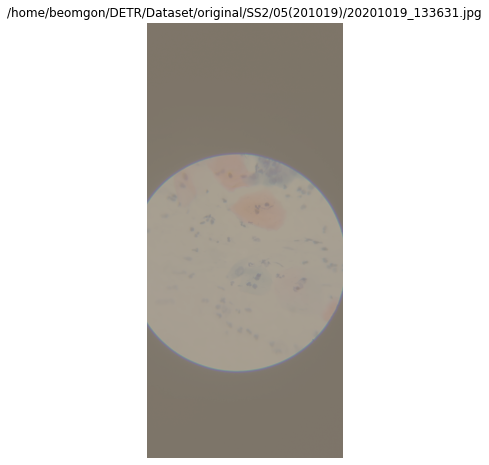

In [165]:
show_example(*train_ds[10])

hi
{'boxes': array([[2288.,  950.,  102.,  114.]], dtype=float32), 'labels': array([0]), 'image_id': array([10])}
[[2288.  950.  102.  114.]]
(4000, 1800, 3)


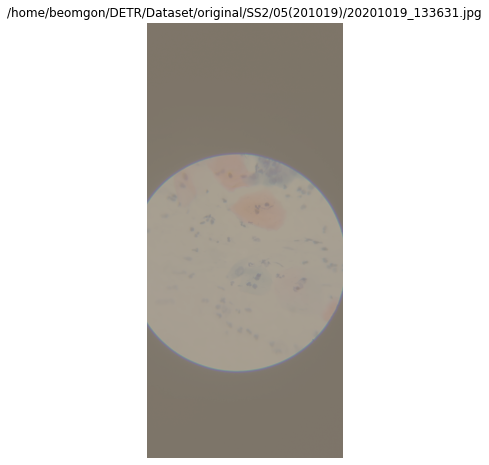

In [172]:
image,target,image_id = train_ds[10]
print('hi')
np_image = image.cpu().numpy().transpose((1,2,0))
# unnormalize the image

np_image = np_image*np.array([0.229, 0.224, 0.225])+np.array([0.485, 0.456, 0.406])
#np_image = (np_image*255).astype(np.uint8)
target = {k: v.cpu().numpy() for k, v in target.items()} 
print(target)

boxes = target['boxes']
print(boxes)
print(np_image.shape)
h,w,_ = np_image.shape
#     boxes = [np.array(box).astype(np.int32) for box in A.augmentations.bbox_utils.denormalize_bboxes(boxes,h,w)]

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

for box in boxes:
    cv2.rectangle(np_image,
              (box[0]-box[2], box[1]-box[3]),
              (box[2]+box[0], box[3]+box[1]),
              (220, 0, 0), 1)

ax.set_axis_off()
ax.imshow(np_image)
ax.set_title(image_id)
plt.show()